### EDA of police street crime data for west yorkshire

#### 1. Import the needed python libraries

In [21]:
#import libraries needed for the analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Import the data and explore the data

In [22]:
# import data into pandas
data = pd.read_csv('west_yorkshire_crime_master.csv')

In [23]:
# look at the first five rows of data
data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,c68c57a4a376ec1ae2d91c38c379e1d742c774e324d233...,2020-10,West Yorkshire Police,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Shoplifting,Investigation complete; no suspect identified,NaN
1,87adc116e1b697b401f63e94fbdd22863f4fdcd0a6d10f...,2020-10,West Yorkshire Police,West Yorkshire Police,-1.881808,53.942344,On or near Stockinger Lane,E01010647,Bradford 001B,Public order,Unable to prosecute suspect,NaN
2,358a59c768df7eafb0a23469d73bb7e4c430b57dc25143...,2020-10,West Yorkshire Police,West Yorkshire Police,-1.883043,53.941869,On or near Southfield Road,E01010647,Bradford 001B,Public order,Unable to prosecute suspect,NaN
3,4d58077e5d09b705a8a3b872458bedcf21a5304989e5f1...,2020-10,West Yorkshire Police,West Yorkshire Police,-1.881808,53.942344,On or near Stockinger Lane,E01010647,Bradford 001B,Vehicle crime,Investigation complete; no suspect identified,NaN
4,1452321b8dc9f377177c99c613070cd19ed26de89ba215...,2020-10,West Yorkshire Police,West Yorkshire Police,-1.881808,53.942344,On or near Stockinger Lane,E01010647,Bradford 001B,Violence and sexual offences,Unable to prosecute suspect,NaN


In [24]:
# look at the last five rows of data
data.tail()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
316162,5cc96d006282ce91e64e38ecd133e7766520ec582b40ec...,2021-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
316163,ecb5c45c00b796d5e665b87d3a33176aaedbc687ebd478...,2021-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
316164,8fc9bbc2d3b9fdd906a925f8be46ce37e2339ae61971c0...,2021-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
316165,56ade0794a287782414f6f9285753493ae97754384ed9a...,2021-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
316166,41605e86ae88fea72c12a5a00e206071d6077b650fa46e...,2021-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN


#### 3. Look at the columns and understand the data

In [25]:
# look at the quantity of data we have
data.shape


(316167, 12)

In [26]:
# now lets make sure the data in the columns are in the right format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316167 entries, 0 to 316166
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               269699 non-null  object 
 1   Month                  316167 non-null  object 
 2   Reported by            316167 non-null  object 
 3   Falls within           316167 non-null  object 
 4   Longitude              309168 non-null  float64
 5   Latitude               309168 non-null  float64
 6   Location               316167 non-null  object 
 7   LSOA code              309168 non-null  object 
 8   LSOA name              309168 non-null  object 
 9   Crime type             316167 non-null  object 
 10  Last outcome category  269699 non-null  object 
 11  Context                0 non-null       float64
dtypes: float64(3), object(9)
memory usage: 28.9+ MB


In [27]:
# convert the month column to date format
data['Month'] = pd.to_datetime(data['Month'])
data['Month'] = data['Month'].dt.month_name()
#data.info()
data.head()
# the month column is now in the right format

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,c68c57a4a376ec1ae2d91c38c379e1d742c774e324d233...,October,West Yorkshire Police,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,E01010646,Bradford 001A,Shoplifting,Investigation complete; no suspect identified,NaN
1,87adc116e1b697b401f63e94fbdd22863f4fdcd0a6d10f...,October,West Yorkshire Police,West Yorkshire Police,-1.881808,53.942344,On or near Stockinger Lane,E01010647,Bradford 001B,Public order,Unable to prosecute suspect,NaN
2,358a59c768df7eafb0a23469d73bb7e4c430b57dc25143...,October,West Yorkshire Police,West Yorkshire Police,-1.883043,53.941869,On or near Southfield Road,E01010647,Bradford 001B,Public order,Unable to prosecute suspect,NaN
3,4d58077e5d09b705a8a3b872458bedcf21a5304989e5f1...,October,West Yorkshire Police,West Yorkshire Police,-1.881808,53.942344,On or near Stockinger Lane,E01010647,Bradford 001B,Vehicle crime,Investigation complete; no suspect identified,NaN
4,1452321b8dc9f377177c99c613070cd19ed26de89ba215...,October,West Yorkshire Police,West Yorkshire Police,-1.881808,53.942344,On or near Stockinger Lane,E01010647,Bradford 001B,Violence and sexual offences,Unable to prosecute suspect,NaN


In [28]:
# we can see that there is a lot of null or missing data in the file, let's check how much we have in each column
data.isnull().sum()
# 1. we can see that there is some consistency with the missing data ie number of missing crime ID = number of missing
# last outcome category, same for latitude and longitude, same for LSOA code and LSOA name
# 2. A few of the columns are not needed and can be dropped eg crime ID,Context, LSOA code' and reported by as the column
#is all = west yorkshire police

Crime ID                  46468
Month                         0
Reported by                   0
Falls within                  0
Longitude                  6999
Latitude                   6999
Location                      0
LSOA code                  6999
LSOA name                  6999
Crime type                    0
Last outcome category     46468
Context                  316167
dtype: int64

In [29]:
# number of months in data set
data.Month.nunique()

12

In [30]:
data['Crime type'].nunique()
# there are 14 categories of crime listed in the data set

14

In [31]:
# drop columns
data_mod = data.drop(columns=['Crime ID','Context','LSOA code','Reported by'])
data_mod

,Month,Falls within,Longitude,Latitude,Location,LSOA name,Crime type,Last outcome category
0,October,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,Bradford 001A,Shoplifting,Investigation complete; no suspect identified
1,October,West Yorkshire Police,-1.881808,53.942344,On or near Stockinger Lane,Bradford 001B,Public order,Unable to prosecute suspect
2,October,West Yorkshire Police,-1.883043,53.941869,On or near Southfield Road,Bradford 001B,Public order,Unable to prosecute suspect
3,October,West Yorkshire Police,-1.881808,53.942344,On or near Stockinger Lane,Bradford 001B,Vehicle crime,Investigation complete; no suspect identified
4,October,West Yorkshire Police,-1.881808,53.942344,On or near Stockinger Lane,Bradford 001B,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...
316162,September,West Yorkshire Police,NaN,NaN,No Location,NaN,Other crime,Under investigation
316163,September,West Yorkshire Police,NaN,NaN,No Location,NaN,Other crime,Under investigation
316164,September,West Yorkshire Police,NaN,NaN,No Location,NaN,Other crime,Under investigation
316165,September,West Yorkshire Police,NaN,NaN,No Location,NaN,Other crime,Under investigation


#### 4. Some Questions to answer

#### a. What months had the most reported crime?

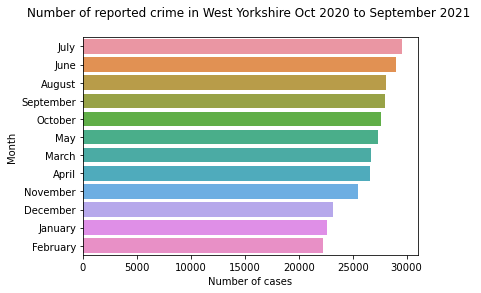

In [32]:
month_crime = data_mod.Month
month_plot = sns.countplot(y = data_mod.Month, order=data_mod.Month.value_counts().index[:12])
plt.title('Number of reported crime in West Yorkshire Oct 2020 to September 2021 \n')
plt.xlabel('Number of cases')
month_data =data_mod.Month.value_counts() 
# in the last 12 months July had the highest number of reported crimes. The summer months were particularly notorious

#### b. what month had the least reported crime?

In [33]:
# from the plot , February had the least number of reported crimes.

#### c. what is the percentage composition of each month in the recorded crimes for the time period?

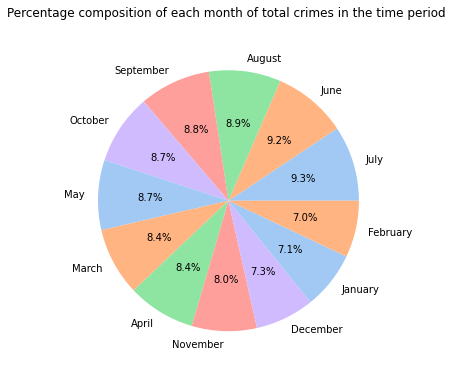

In [34]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#define the size of the pie chart
plt.figure(figsize=(12,6))

#create pie chart
plt.title('Percentage composition of each month of total crimes in the time period \n')
plt.pie(data_mod.Month.value_counts(), labels =data_mod.Month.value_counts().index , colors = colors, autopct='%1.1f%%');

In [35]:
# The crime record is almost evenly distributed, there is an approximately 2% difference in number of recorded crime between the
# maximum and the minimum.

#### d. what is the most reported crime type?

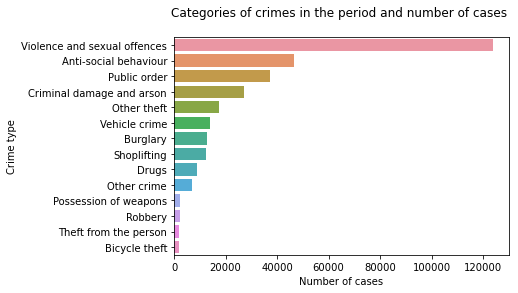

In [36]:
# bar chart for crime data
crime_plot = sns.countplot(y=data_mod['Crime type'], order=data_mod['Crime type'].value_counts().index[:14])
plt.title('Categories of crimes in the period and number of cases \n')
plt.xlabel('Number of cases');

In [37]:
# total number of each crime category for crime rates calculation
crime_count = data_mod['Crime type'].value_counts()
crime_count

Violence and sexual offences    123859
Anti-social behaviour            46468
Public order                     37425
Criminal damage and arson        27219
Other theft                      17569
Vehicle crime                    13942
Burglary                         12845
Shoplifting                      12393
Drugs                             8741
Other crime                       7112
Possession of weapons             2382
Robbery                           2375
Theft from the person             2030
Bicycle theft                     1807
Name: Crime type, dtype: int64

In [38]:
# the most common crime type in the year under review is 'violence and sexual offences', the least was bicycle theft. 
# A statistically more accurate way to understand  these figures will be to view them as rates eg what percentage of
# west yorkshire residents own bicycles and then divide that by the number of bicycle theft to know the number per head.

#### e. what is the percentage composition of each crime type in the in the total crimes reported for the year?

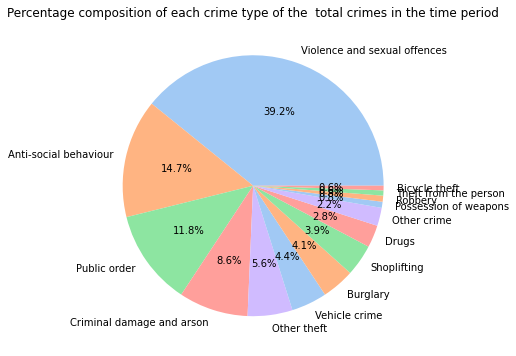

In [39]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#define the size of the pie chart
plt.figure(figsize=(12,6))

#create pie chart
plt.title('Percentage composition of each crime type of the  total crimes in the time period')
plt.pie(data_mod['Crime type'].value_counts(), labels =data_mod['Crime type'].value_counts().index , colors = colors, autopct='%1.1f%%');

#### f. what are the top 3 reported crime type for each month of the year?

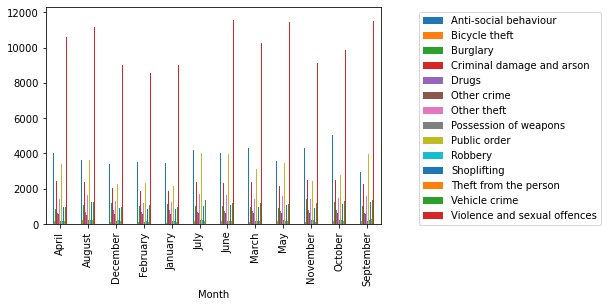

In [40]:
#plt.figure(figsize=(7,16))
data_mod.groupby(['Month','Crime type']).size().unstack('Crime type').plot(kind='bar')
plt.legend(bbox_to_anchor=(1.1,1.0))

In [41]:
# the top three crimes for every single month were voilence and sexual offences, anti-social behaviour, and public order
# except in November when it was voilence and sexual offences, anti-social behaviour, and criminal damage and arson.

In [42]:
data_mod.columns

Index(['Month', 'Falls within', 'Longitude', 'Latitude', 'Location',
       'LSOA name', 'Crime type', 'Last outcome category'],
      dtype='object')

In [43]:
# understanding the contents of the column with the outcomes of the reported crimes
data_mod['Last outcome category'].nunique()

13

#### g. what is the most common outcome of the cases reported to the police?

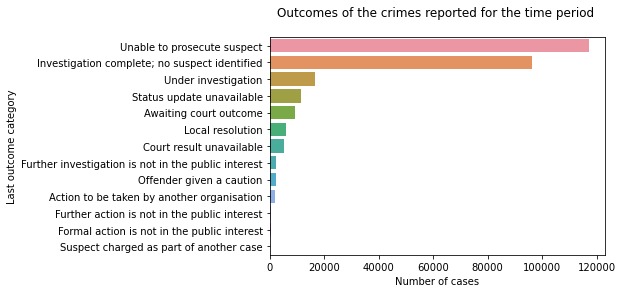

In [44]:
outcome_plot = sns.countplot(y=data_mod['Last outcome category'], order=data_mod['Last outcome category'].value_counts().index[:13])
plt.title('Outcomes of the crimes reported for the time period \n')
plt.xlabel('Number of cases');
# From the plot below , a high number of cases end up being not taken to court because no suspects are identified or the cases 
# are not prosecuted.

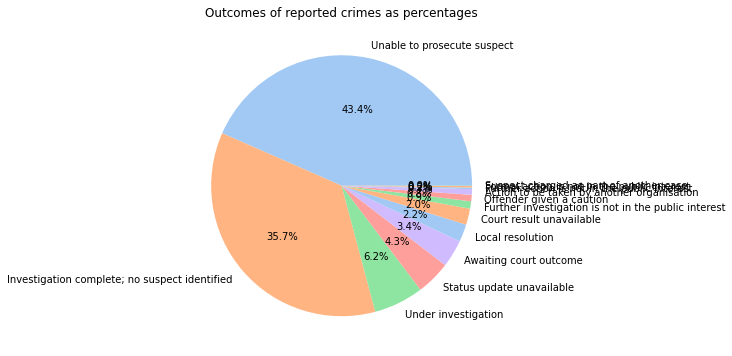

In [45]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#define the size of the pie chart
plt.figure(figsize=(12,6))

#create pie chart
plt.title('Outcomes of reported crimes as percentages')
plt.pie(data_mod['Last outcome category'].value_counts(), labels =data_mod['Last outcome category'].value_counts().index , colors = colors, autopct='%1.1f%%');

In [46]:
data_mod['Location'].nunique()

21137

#### h. What are the most notorious locations in West Yorkshire?

In [47]:
# we need to eliminate the rows where the location is missing
data_mod['LSOA name'].nunique()

1425

In [48]:
location = data_mod.dropna()
location

,Month,Falls within,Longitude,Latitude,Location,LSOA name,Crime type,Last outcome category
0,October,West Yorkshire Police,-1.879031,53.943807,On or near Cross End Fold,Bradford 001A,Shoplifting,Investigation complete; no suspect identified
1,October,West Yorkshire Police,-1.881808,53.942344,On or near Stockinger Lane,Bradford 001B,Public order,Unable to prosecute suspect
2,October,West Yorkshire Police,-1.883043,53.941869,On or near Southfield Road,Bradford 001B,Public order,Unable to prosecute suspect
3,October,West Yorkshire Police,-1.881808,53.942344,On or near Stockinger Lane,Bradford 001B,Vehicle crime,Investigation complete; no suspect identified
4,October,West Yorkshire Police,-1.881808,53.942344,On or near Stockinger Lane,Bradford 001B,Violence and sexual offences,Unable to prosecute suspect
...,...,...,...,...,...,...,...,...
315491,September,West Yorkshire Police,-1.325902,53.591267,On or near Grove Drive,Wakefield 045D,Violence and sexual offences,Unable to prosecute suspect
315492,September,West Yorkshire Police,-1.330234,53.587723,On or near Millars Walk,Wakefield 045D,Violence and sexual offences,Unable to prosecute suspect
315493,September,West Yorkshire Police,-1.330320,53.590852,On or near Mill Street,Wakefield 045D,Violence and sexual offences,Unable to prosecute suspect
315494,September,West Yorkshire Police,-1.331445,53.590462,On or near Marion Close,Wakefield 045D,Violence and sexual offences,Under investigation


Text(0.5, 1.0, 'Top 10 locations where crimes occur in West Yorkshire \n')

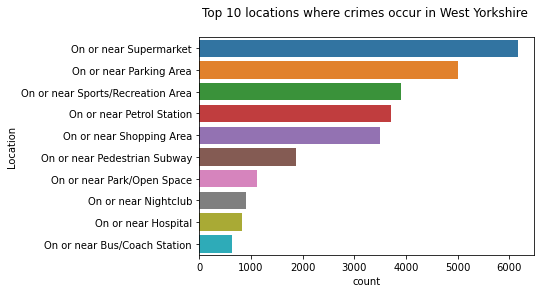

In [49]:
location_plot = sns.countplot(y=location['Location'], order=location['Location'].value_counts().index[:10])
plt.title('Top 10 locations where crimes occur in West Yorkshire \n')
# the top 10 locations are public places

#### i. what are the most notorious LSOA's in west yorkshire?

Text(0.5, 1.0, "Top 10 LSOA's where crimes occur in West Yorkshire \n")

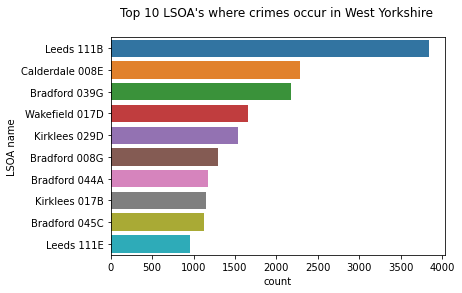

In [50]:
location_plot = sns.countplot(y=location['LSOA name'], order=location['LSOA name'].value_counts().index[:10])
plt.title('Top 10 LSOA\'s where crimes occur in West Yorkshire \n')